In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Boston Dataset 

### Dataset loading

In [2]:
#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets

boston = datasets.load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dataframe transform  

In [3]:
from pandas import DataFrame

boston_frame = DataFrame(boston.data)
boston_frame.columns = boston.feature_names
boston_frame['target'] = boston.target
boston_frame.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Feature plots

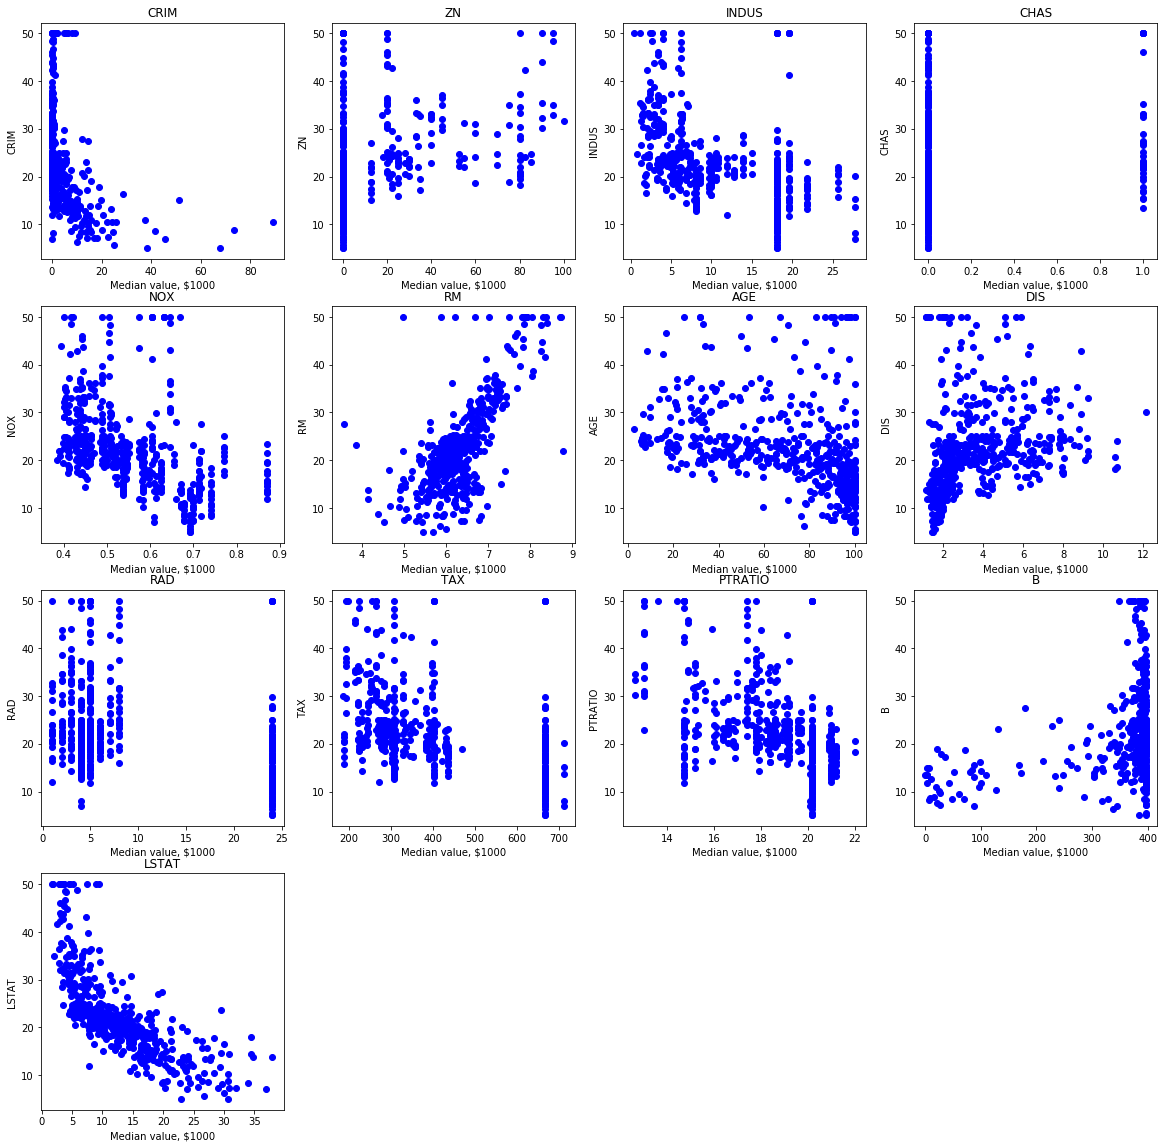

In [4]:
pyplot.figure(figsize(20, 20))

plot_number = 0

for feature_name in boston.feature_names:
    pyplot.subplot(4, 4, plot_number + 1)
    pyplot.scatter(list(map(lambda x : x[plot_number], boston.data)), boston.target, color = 'b')
    pyplot.title(feature_name)
    pyplot.xlabel('Median value, $1000')
    pyplot.ylabel(feature_name)
    plot_number += 1

### Linear regression model learning

In [5]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(boston.data, boston.target)
boston_predictions = linear_regressor.predict(boston.data)


### Basic estimators

In [6]:
from sklearn import metrics

mea = metrics.mean_absolute_error(boston.target, boston_predictions)
print ('MAE = ', mea)
msa = metrics.mean_squared_error(boston.target, boston_predictions)
print ('MSE = ', msa)


MAE =  3.270862810900316
MSE =  21.894831181729202


### Error plotting

Text(0, 0.5, 'target')

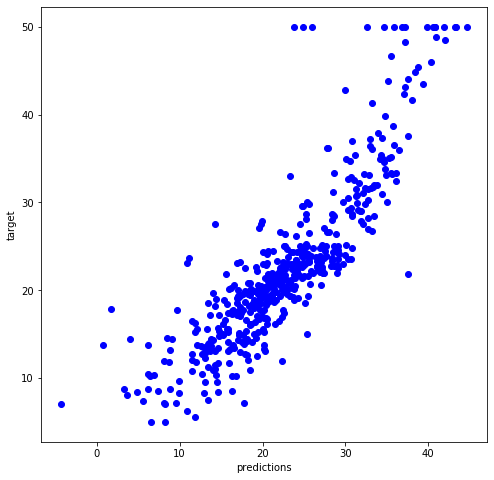

In [7]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(boston_predictions, boston.target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')


### Linear regression function

In [8]:
print ("Model")
print ("y = {:.3f}*x1 + {:.3f}*x2 + ... + {:.3f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))


Model
y = -0.108*x1 + 0.046*x2 + ... + 36.459


# Generated dataset

### Generate dataset

In [9]:
n=random.randint(1,20)
n

6

In [10]:
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
data, target, coef = datasets.make_regression(n_samples=270, n_features = 27, n_informative = 6, n_targets = 1, 
                                              noise = random.randint(1,20), coef = True, random_state = 2)  

### Plot data

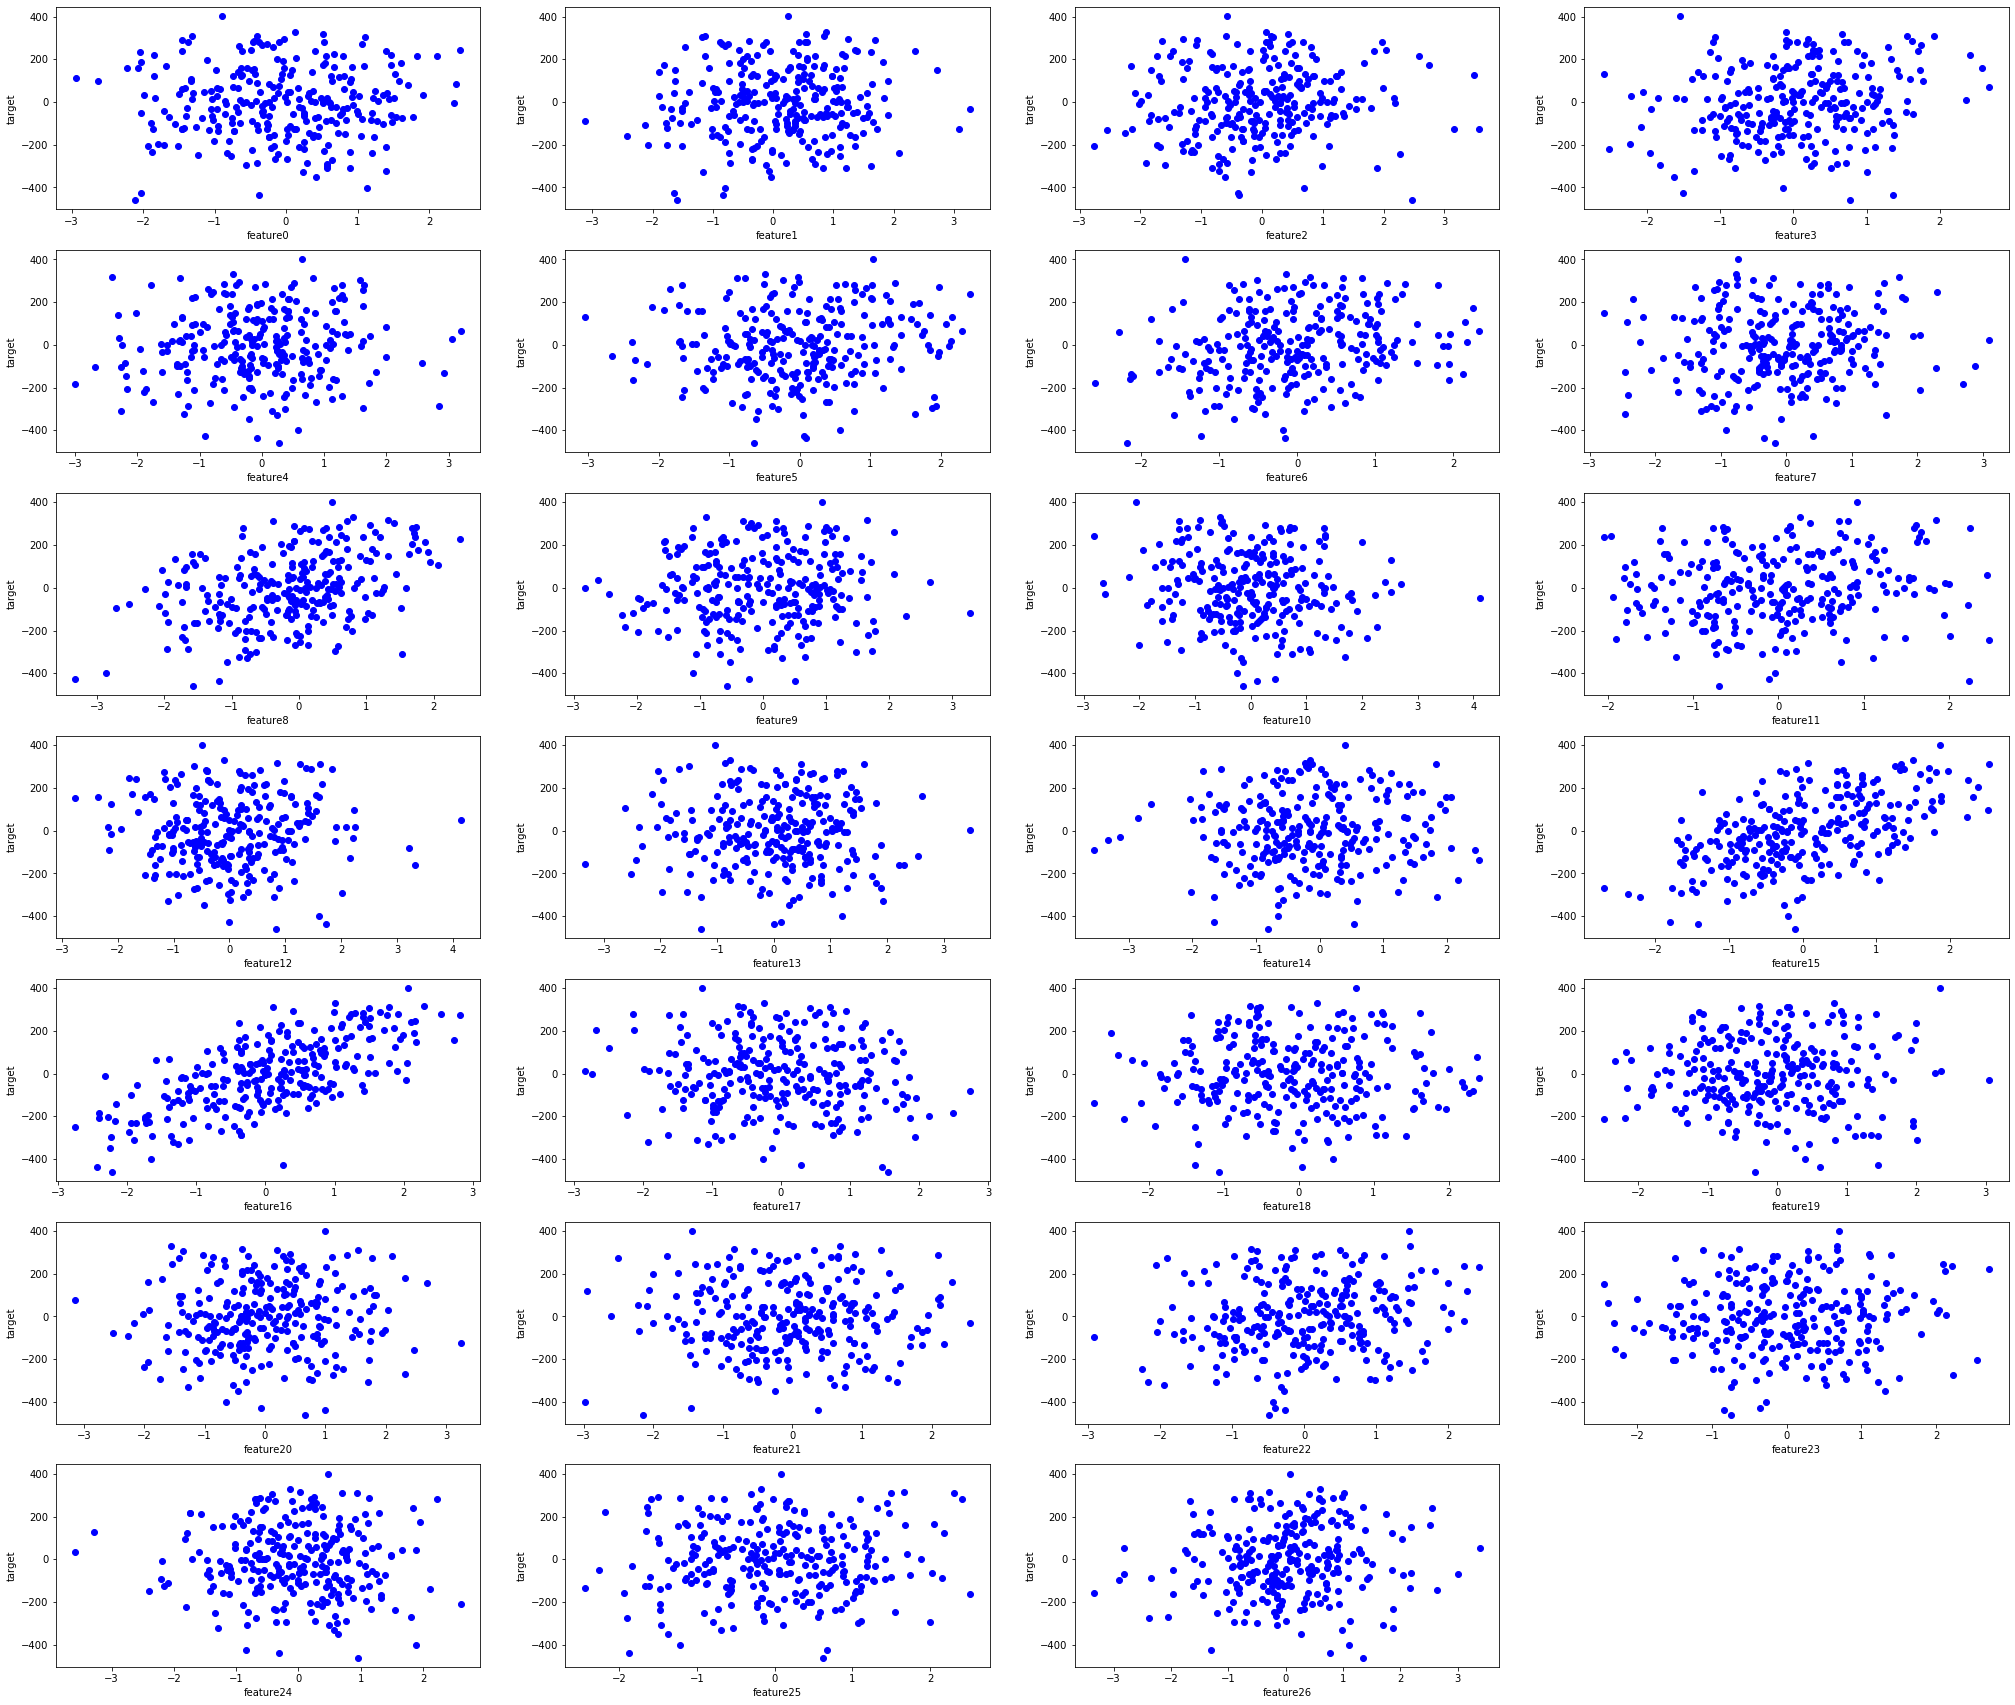

In [11]:
pyplot.figure(figsize(35, 35))

for i in range(np.size(data,1)):
    pyplot.subplot(8,4, i + 1)
    pyplot.scatter(list(map(lambda x : x[i], data)), target, color = 'r')
    pyplot.xlabel('feature'+ str(i))
    pyplot.ylabel('target')

### Learn linear regression model and get predictions

In [12]:
regression_model = linear_model.LinearRegression()
regression_model.fit(data, target)
predictions = regression_model.predict(data)

### Print linear regression coefficients

In [13]:
print ("Model coefficients")
print ('x0 = ', regression_model.intercept_)
print ('x1, x2 = ', regression_model.coef_)

Model coefficients
x0 =  -0.38810508811946764
x1, x2 =  [-2.01876227e-01  1.17853416e-01 -1.80565852e-01 -2.83750815e-01
 -9.56778686e-02  5.73073781e-01  4.28403337e+01  1.35953119e-01
  7.16601672e+01  1.82141950e-01 -6.80417979e-01  1.22151954e+01
  3.60582293e-02  6.23249245e-01  1.17194472e-01  8.14951939e+01
  9.64508839e+01  1.83399435e-01 -8.14307564e-01 -2.86705215e-01
  2.83071212e-01 -7.03158317e-01  4.25648136e+01  1.06684112e+00
  1.11360788e+00  8.09761114e-02  2.73508841e-01]


### Plot predictions

Text(0, 0.5, 'target')

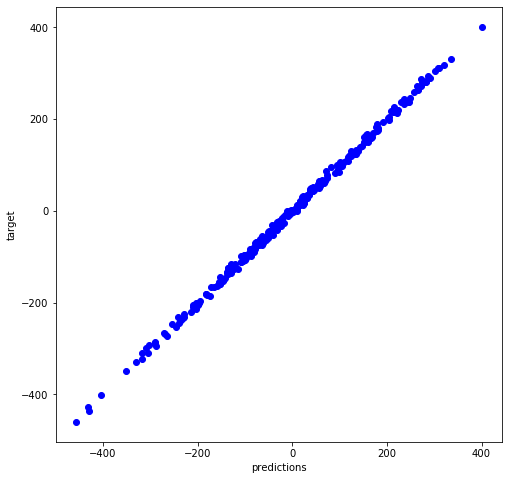

In [14]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(predictions, target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')

### Print learned and true regression models

In [15]:
print ("Learned regression model")
print ("y = {:.3f}*x1 + {:.3f}*x2 + {:.3f}\n".format(regression_model.coef_[0], 
                                                  regression_model.coef_[1], 
                                                  regression_model.intercept_))
print ("True regression model")
print ("y = {:.3f}*x1 + {:.3f}*x2 ".format(coef[0],coef[1]))

Learned regression model
y = -0.202*x1 + 0.118*x2 + -0.388

True regression model
y = 0.000*x1 + 0.000*x2 


### Print evaluation metrics

In [16]:
mae = metrics.mean_absolute_error(target, predictions)
print ('MAE = ', mae)
mse = metrics.mean_squared_error(target, predictions)
print ('MSE = ', mse)

MAE =  4.631099056410843
MSE =  33.120116141121265
